In [3]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [4]:
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [6]:
# Importing Data
fc = pd.read_csv('Fraud_check.csv')

In [7]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
# checking for null values
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
fc.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [11]:
numeric_cols = ['Taxable.Income','City.Population', 'Work.Experience']

# Calculate the correlation matrix of only the numeric columns
correlation_matrix = fc[numeric_cols].corr()
correlation_matrix


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<Axes: >

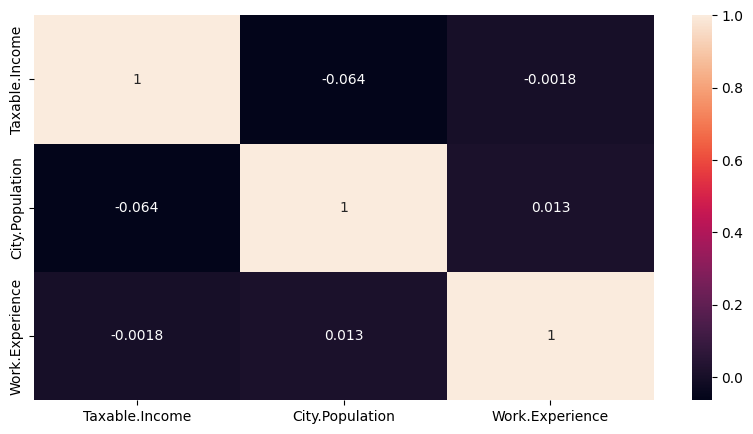

In [12]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(fc[numeric_cols].corr(),annot=True)

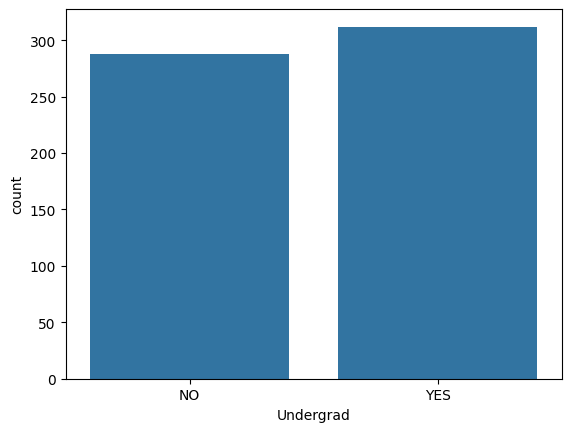

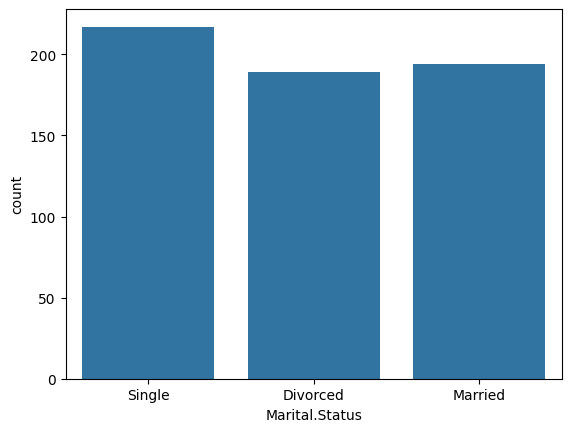

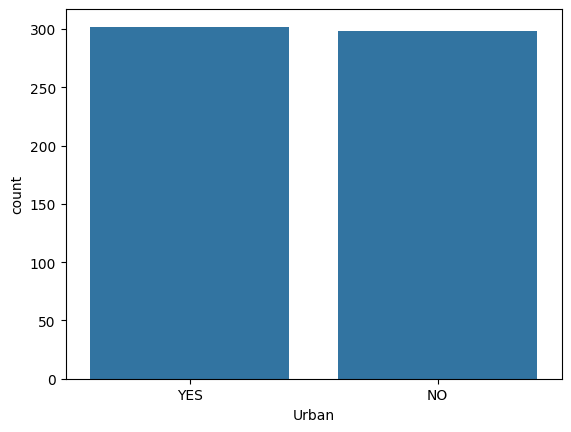

In [17]:
# Visualizing the categorical columns
categorical_cols = ['Undergrad','Marital.Status','Urban']
for col in categorical_cols:
  sns.countplot(x=col,data=fc,)
  plt.show()

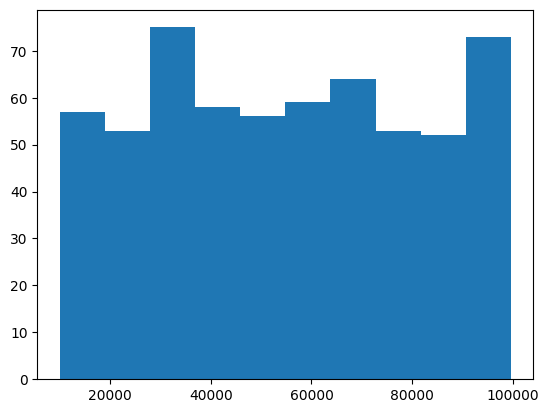

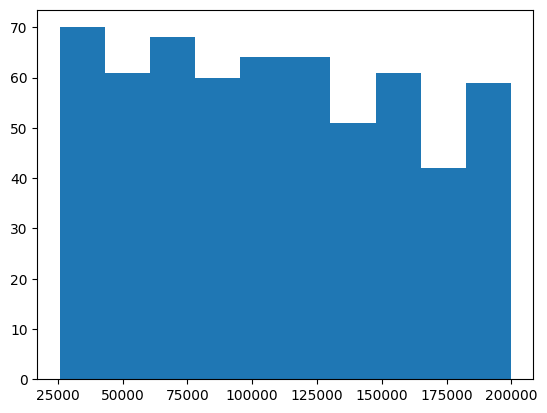

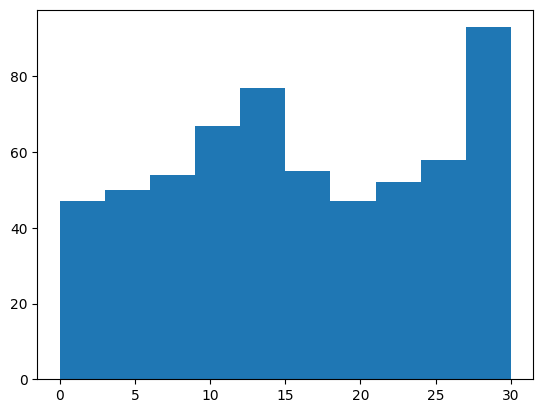

In [18]:
# Visualizing the numerical columns
numeric_cols = ['Taxable.Income','City.Population','Work.Experience']
for col in numeric_cols:
  plt.hist(x=col,data=fc)
  plt.show()

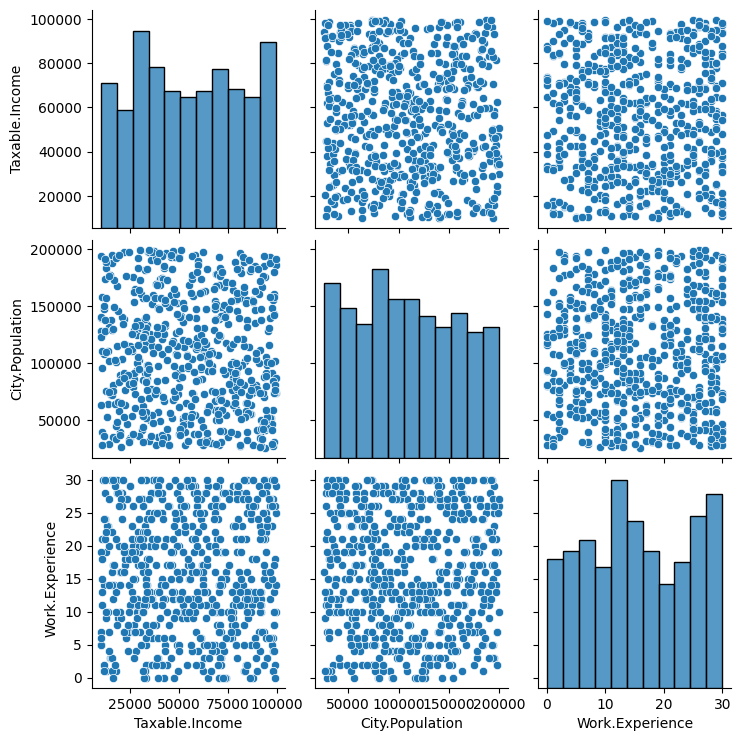

In [21]:
# pairplot
sns.pairplot(fc)

In [22]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])
fc1 = encoder.fit_transform(fc)

In [23]:
# Converting the Target column i.e. Taxable Income into Categorical value
tax_val = []
for value in fc["Taxable.Income"]:
 if value<=30000:
    tax_val.append("Risky")
 else:
    tax_val.append("Good")
fc1["tax_val"]= tax_val

In [24]:
fc1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good
...,...,...,...,...,...,...,...
595,2,2,76340,39492,7,1,Good
596,2,2,69967,55369,2,1,Good
597,1,2,47334,154058,0,1,Good
598,2,3,98592,180083,17,2,Good


In [25]:
x = fc1.drop(['tax_val','Taxable.Income'], axis =1)
y = fc1['tax_val']

In [26]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2


In [27]:
y.value_counts()

tax_val
Good     476
Risky    124
Name: count, dtype: int64

In [28]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

## **Building Decision Tree Classifier using Entropy Criteria **
## **Iteration-1: Max Depth = 2**

In [29]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [30]:
#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test))
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train))

Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8


## **Iteration-2: Max Depth = 3**

In [31]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:
#Predicting on test data
pred_test2 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test))
#Predicting on train data
pred_train2 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train))

Test data Accuracy is: 0.7722222222222223
Train data Accuracy is: 0.8047619047619048


## **Iteration-3: Max Depth = 4**

In [33]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [34]:
#Predicting on test data
pred_test3 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test))
#Predicting on train data
pred_train3 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train))

Test data Accuracy is: 0.7611111111111111
Train data Accuracy is: 0.8119047619047619


## **Iteration-4: Max Depth = 5**

In [35]:
model4 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [36]:
#Predicting on test data
pred_test4 = model4.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test4==y_test))
#Predicting on train data
pred_train4 = model4.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train4==y_train))

Test data Accuracy is: 0.7666666666666667
Train data Accuracy is: 0.8166666666666667


## **we will consider Iteration-1 max depth = 2.**

Text(0.5, 1.0, 'Decision tree using Entropy')

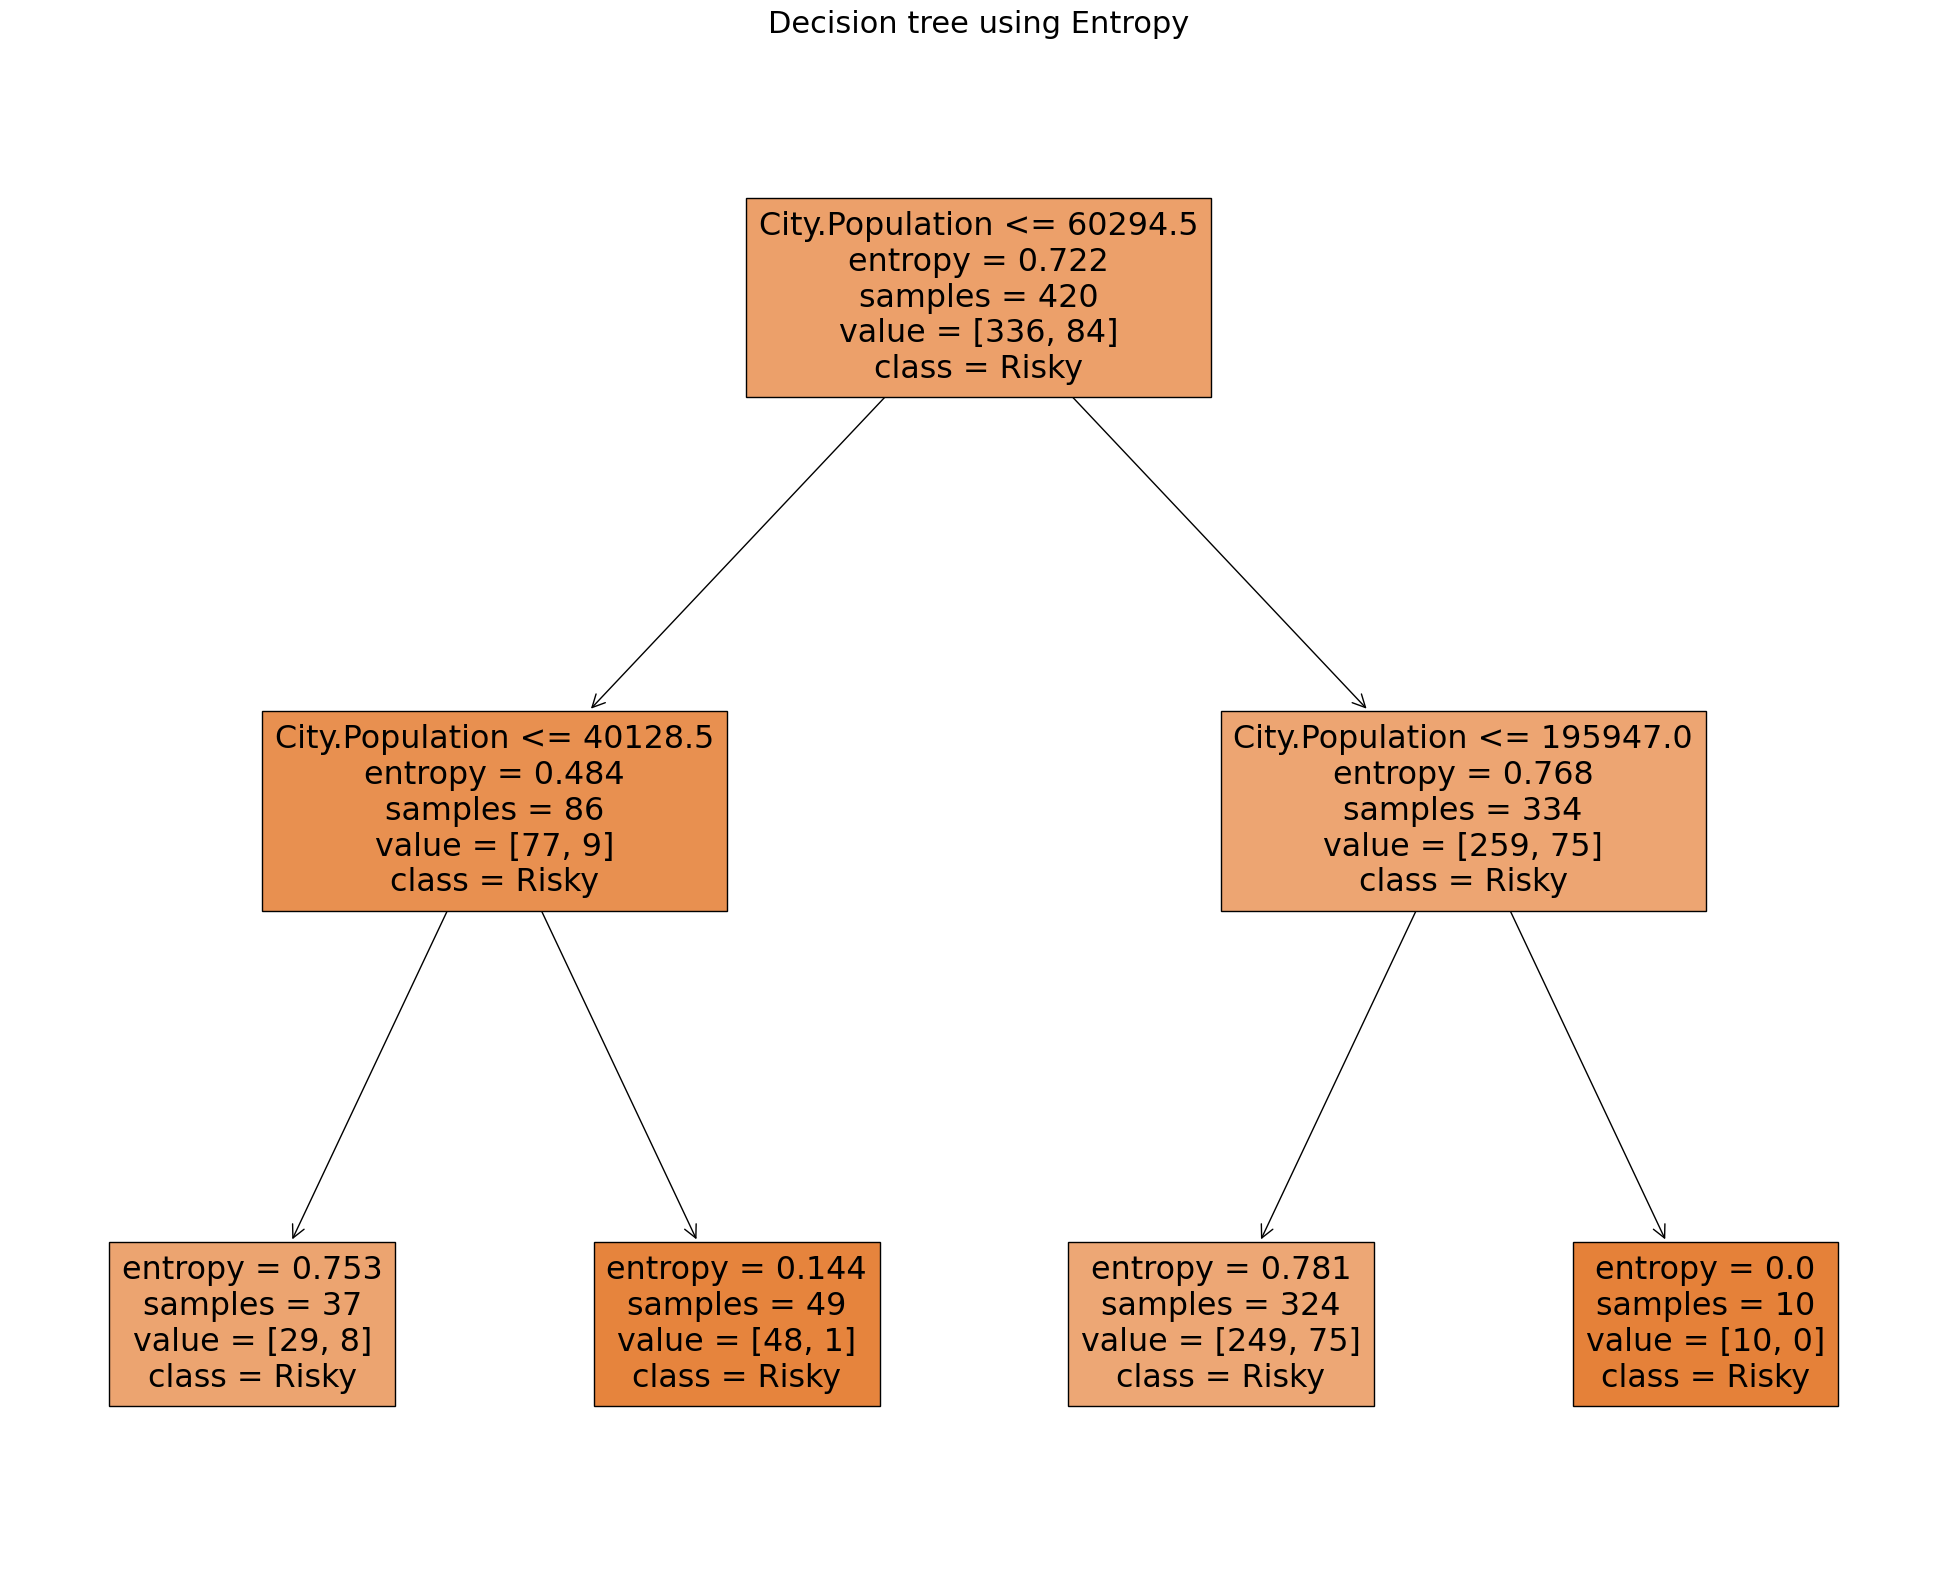

In [37]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model1,
feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

## **Building Decision Tree Classifier using Gini Criteria**
### **Iteration-1: Max Depth = 2**

In [38]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=2)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [39]:
#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test))
#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train))

Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8


### **Iteration-2: Max Depth = 3**

In [40]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
#Predicting on test data
pred_testg2 = model_gini2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg2==y_test))
#Predicting on train data
pred_traing2 = model_gini2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing2==y_train))

Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8


### **Iteration-3: Max Depth = 4**

In [42]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [43]:
#Predicting on test data
pred_testg3 = model_gini3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg3==y_test))
#Predicting on train data
pred_traing3 = model_gini3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing3==y_train))

Test data Accuracy is: 0.7666666666666667
Train data Accuracy is: 0.8142857142857143


# **we will consider Iteration-1 max depth = 2.**

Text(0.5, 1.0, 'Decision tree using Gini')

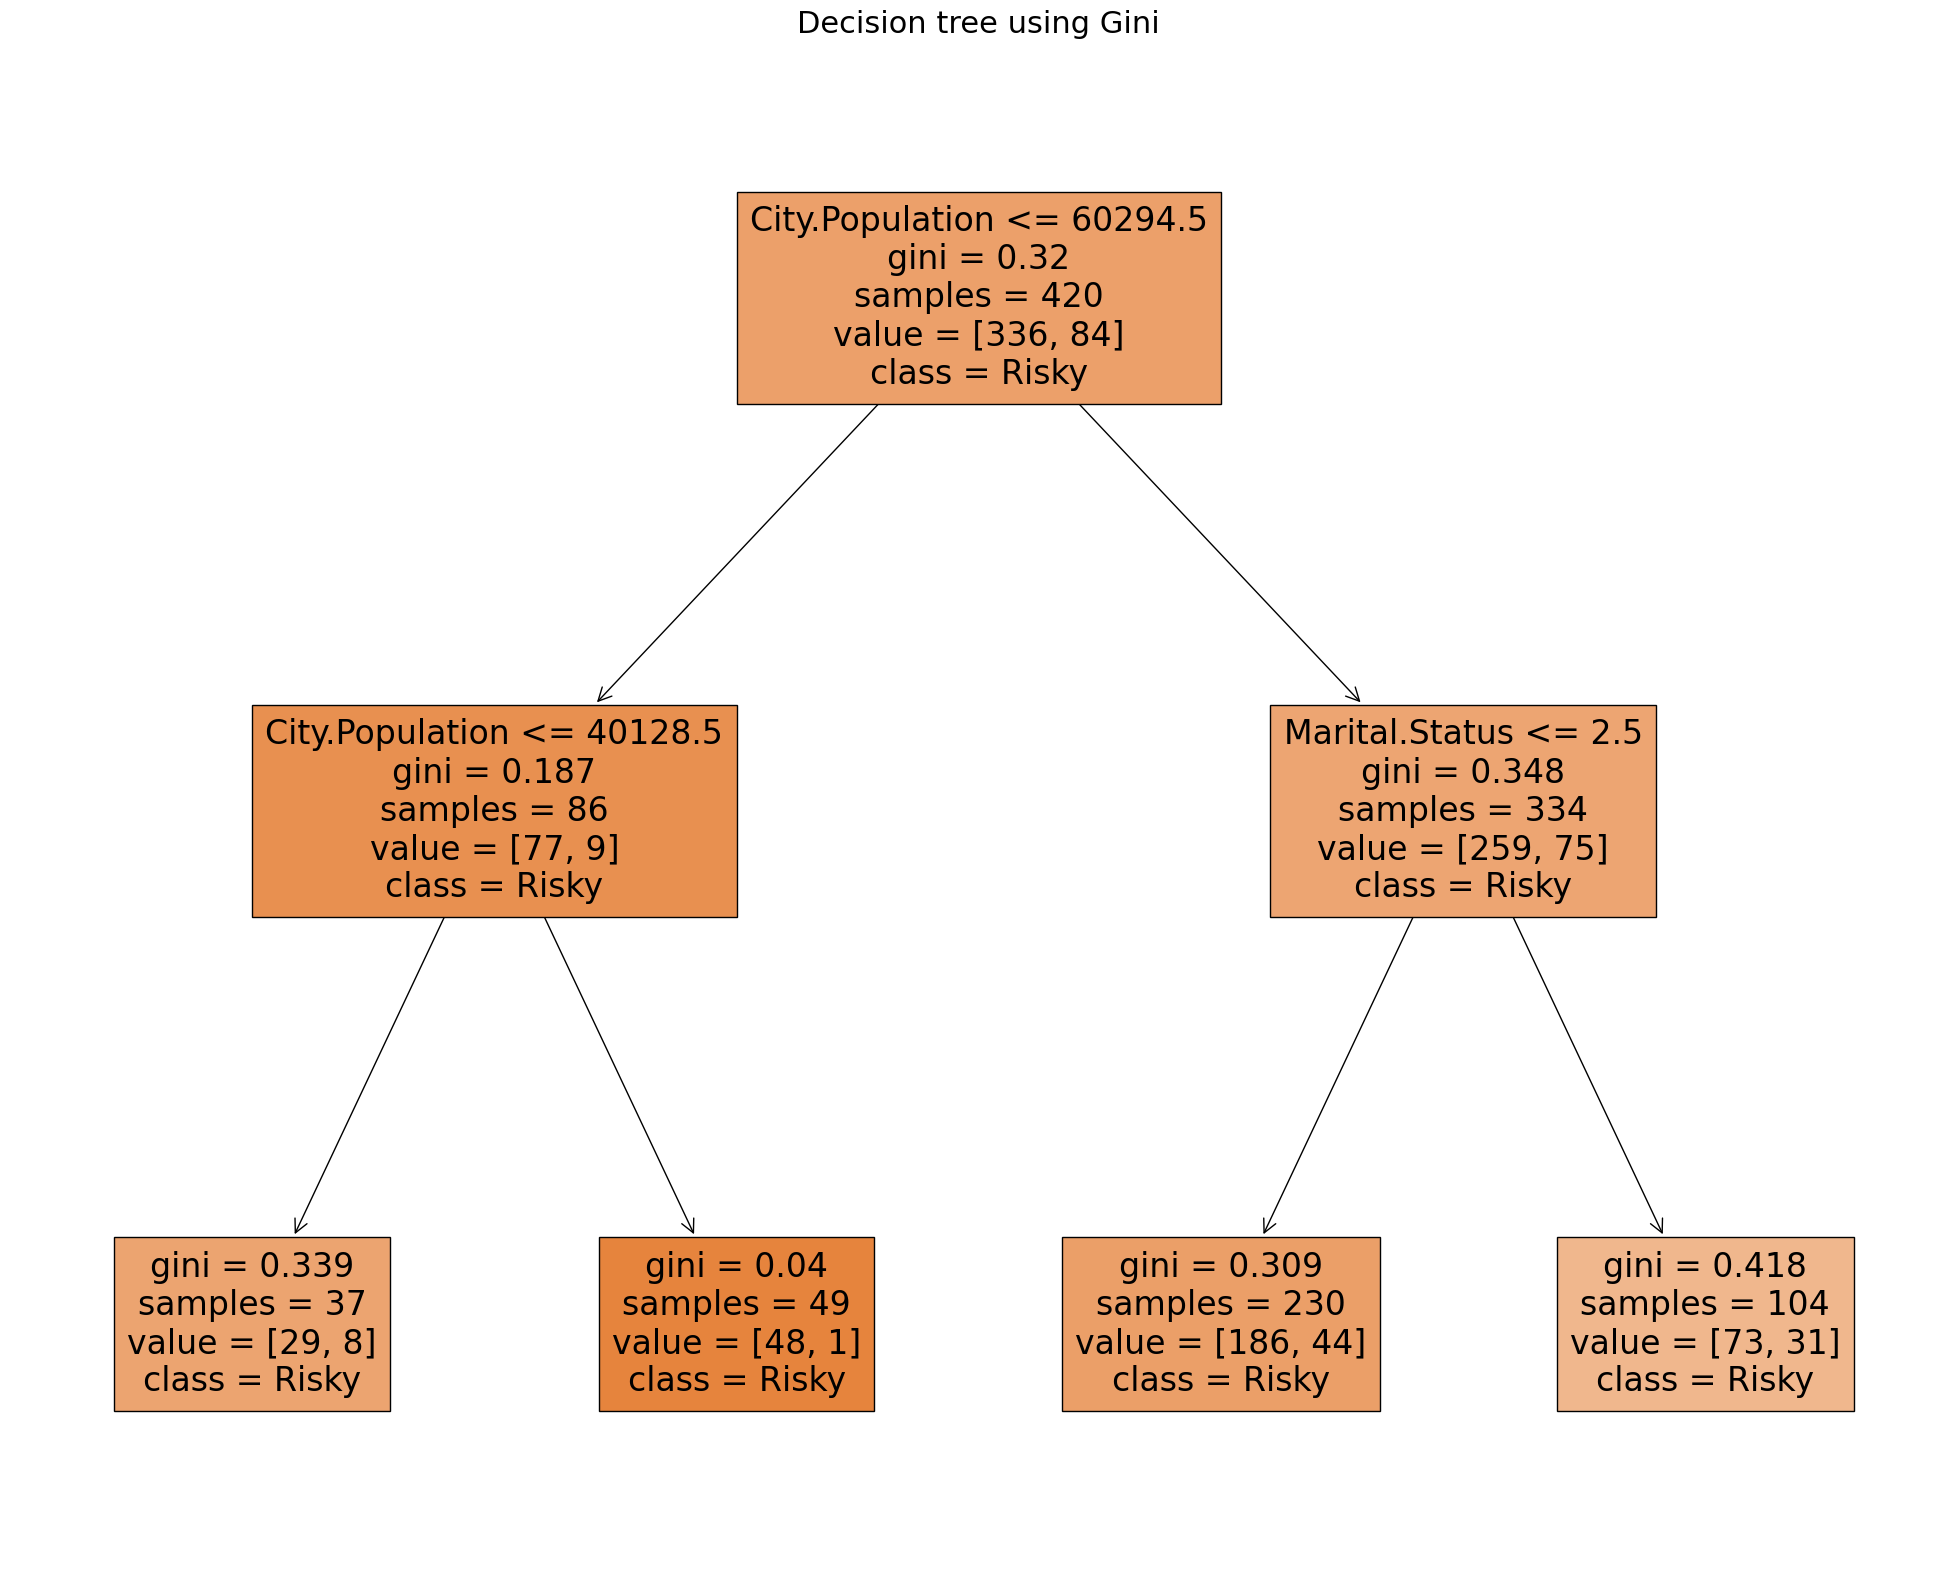

In [44]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini1,
feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)